In [176]:
import joblib
import time
import mysql.connector
from datetime import date
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)
sns.set_palette("cool")


In [352]:

df = pd.read_csv('olx_data_With_Final_Cleaning.csv')
df


C:\Users\Commandor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-02-28,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000,115,3,3,...,1,1,1,1,0,0,0,0,2,1521
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-04-14,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000,115,3,1,...,0,0,0,0,0,0,0,0,4,1565
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,2022-04-28,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000,115,3,2,...,0,0,0,0,0,0,0,0,4,1304
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-04-26,Gesr Al Suez,no_compound,Apartment,450000,135,3,7,...,0,0,0,0,0,0,0,0,4,3333
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,2022-04-28,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000,115,3,2,...,0,0,0,0,0,0,0,0,4,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-04-28,15 May City,no_compound,Apartment,550000,125,3,2,...,0,0,0,0,0,0,0,0,4,4400
37705,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بكمبوند دار مصر دور ثالث,2022-04-28,15 May City,Dar Misr,Apartment,600000,140,3,3,...,0,0,0,0,0,0,0,0,4,4285
37706,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2022-02-28,15 May City,Jewar,Apartment,470000,80,2,5,...,0,0,0,0,0,0,0,0,2,5875
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2022-02-28,15 May City,no_compound,Apartment,470000,100,2,4,...,1,1,0,1,0,0,0,0,2,4700


In [95]:
df['date']=pd.to_datetime(df['date'],format='%Y/%m/%d')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  int64         
 7   area                         37709 non-null  int64         
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

# Univariate Analaysis

location

New Cairo - El Tagamoa    12948
Madinaty                   3818
Badr City                  1684
Heliopolis                 1623
Gesr Al Suez               1561
Rehab City                 1250
Mokattam                   1224
Nasr City                  1174
Ain Shams                  1118
Zahraa Al Maadi            1084
Helwan                      848
Mostakbal City              750
New Capital City            705
Maadi                       677
Downtown Cairo              641
Helmeyat El Zaytoun         611
Shorouk City                578
Katameya                    496
Sheraton                    467
Shubra                      464
Salam City                  429
Hadayek al-Kobba            394
Marg                        373
Obour City                  364
New Nozha                   357
Hadayek Helwan              346
Matareya                    324
Dar al-Salaam               199
Ezbet El Nakhl              196
15 May City                 193
Zawya al-Hamra              15

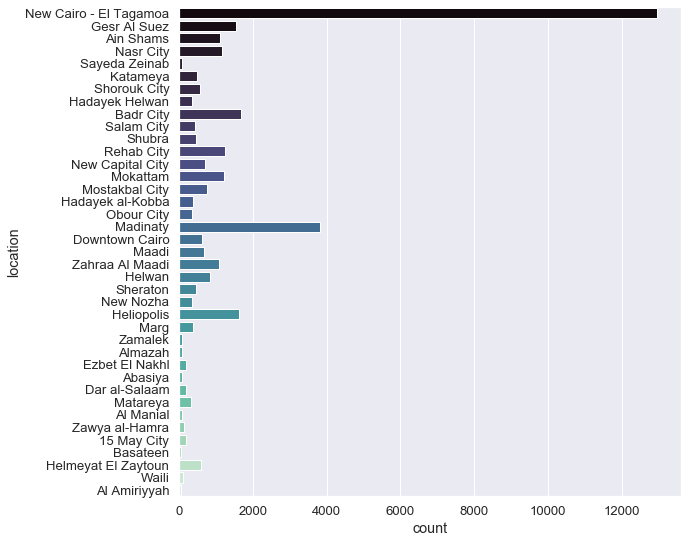

In [231]:
print('location')
print('')
print(df['location'].value_counts())
sns.countplot(y='location',data=df,palette='mako',)


In [232]:
print('compound')
print('')
print(df['compound'].value_counts()[:10])



compound

no_compound            16025
Jewar                   5066
Madinaty                2940
Sama                    1074
Beit Al Watan            633
L’Avenir                 545
Eastown                  484
Makany                   435
Mivida                   427
Mountain View iCity      424
Name: compound, dtype: int64


In [233]:
print('compound')
print('')
print(df['compound'].value_counts()[-20:])


compound

Sky Capital View             1
Sun Capital                  1
Cleopatra Palace             1
La Vista City                1
Bel Air - Sodic              1
TRUE Gate                    1
GCR Golf City                1
Anakaji                      1
Sueno                        1
Armonia                      1
Green Avenue                 1
Shorouk Gardens              1
Al Rabwa                     1
Sun City Gardens             1
Al Solaimaneyah Golf City    1
Go Heliopolis                1
Dreamland                    1
Creek Park                   1
Stella New Cairo             1
Etlalah                      1
Name: compound, dtype: int64


bedrooms
3      12693
3      12523
2       7493
2       3861
4        681
1        331
5         77
6         29
10         5
10+        5
8          4
7          4
9          3
Name: bedrooms, dtype: int64


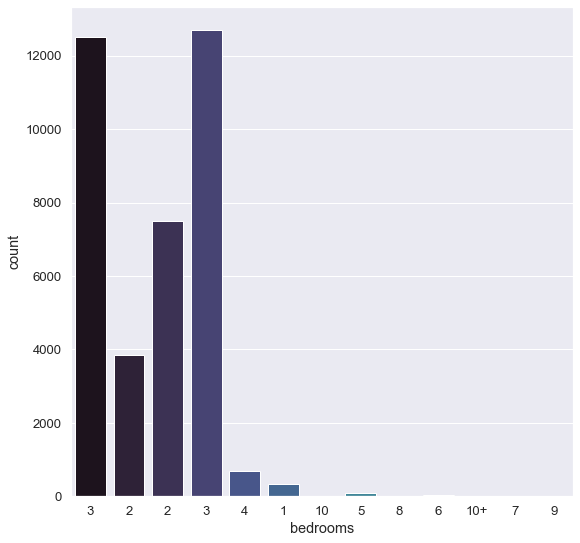

In [234]:
print('bedrooms')
print(df['bedrooms'].value_counts())
sns.countplot(x='bedrooms',data=df,palette='mako')


level
2          7957
3          6477
1          5957
Ground     4952
4          3691
5          2886
6          1410
7           859
10+         831
8           800
9           770
10          716
Highest     403
Name: level, dtype: int64


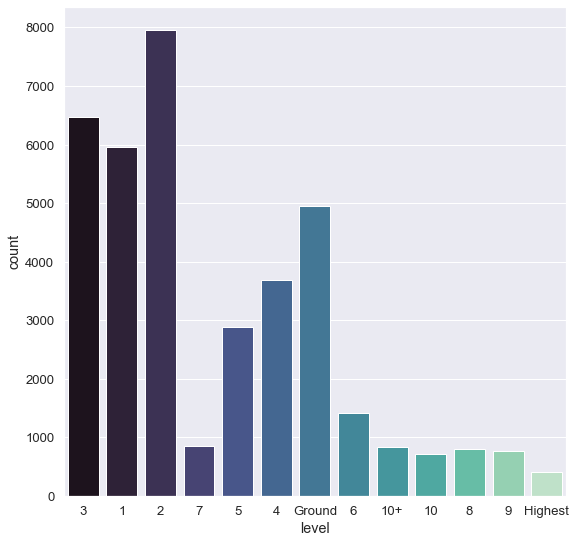

In [235]:
print('level')
print(df['level'].value_counts())
sns.countplot(x='level',data=df,palette='mako')


furnished
No     36229
Yes     1480
Name: furnished, dtype: int64


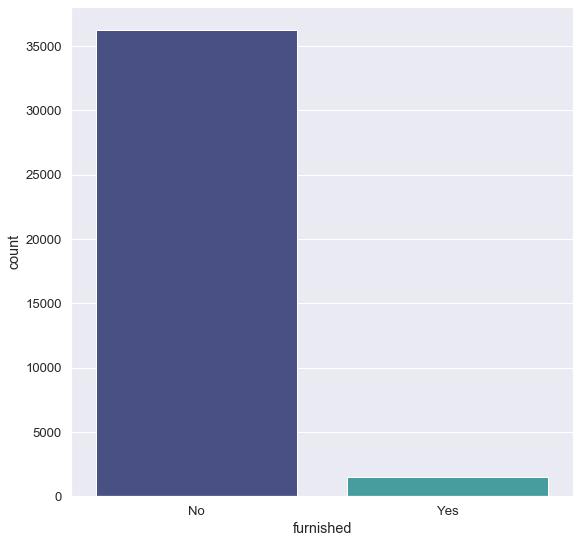

In [236]:
print('furnished')
print(df['furnished'].value_counts())
sns.countplot(x='furnished',data=df,palette='mako')


price_type
Not Negotiable    28640
Negotiable         9069
Name: price_type, dtype: int64


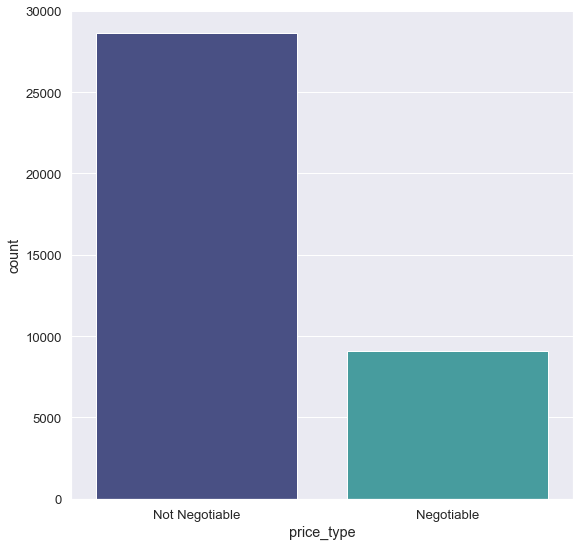

In [237]:
print('price_type')

print(df['price_type'].value_counts())
sns.countplot(x='price_type',data=df,palette='mako')


delivery_date
Ready to move      32350
soon                1473
2024                1368
2023                 932
2022                 544
2025                 484
within 6 months      468
2026                  86
2027                   2
2030                   1
2028                   1
Name: delivery_date, dtype: int64


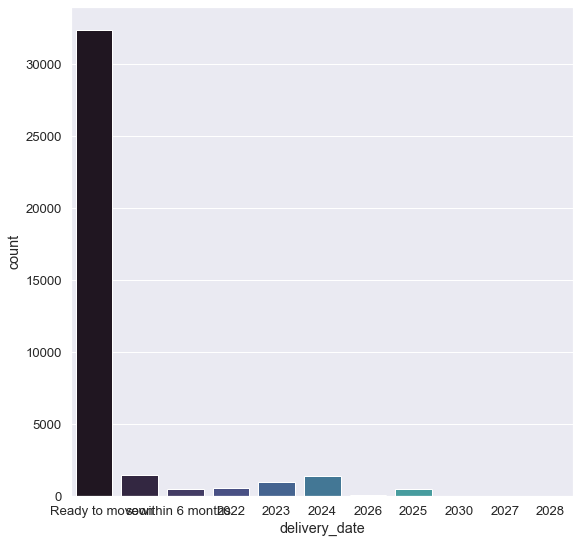

In [238]:
print('delivery_date')

print(df['delivery_date'].value_counts())
sns.countplot(x='delivery_date',data=df,palette='mako')


electricity_meter
1    21836
0    15873
Name: electricity_meter, dtype: int64


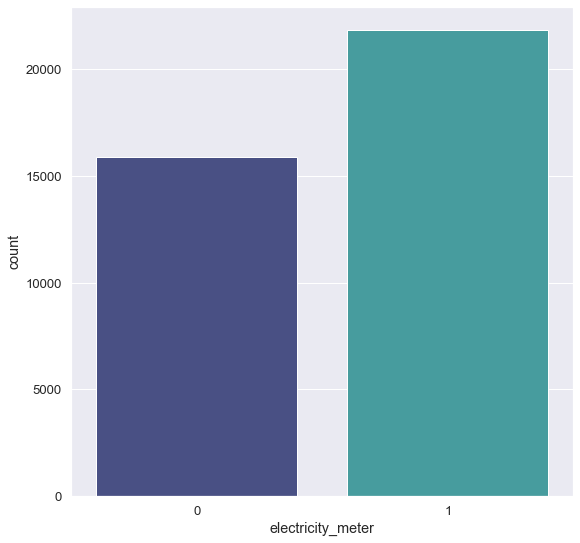

In [239]:
print('electricity_meter')

print(df['electricity_meter'].value_counts())
sns.countplot(x='electricity_meter',data=df,palette='mako')


balcony
1    21813
0    15896
Name: balcony, dtype: int64


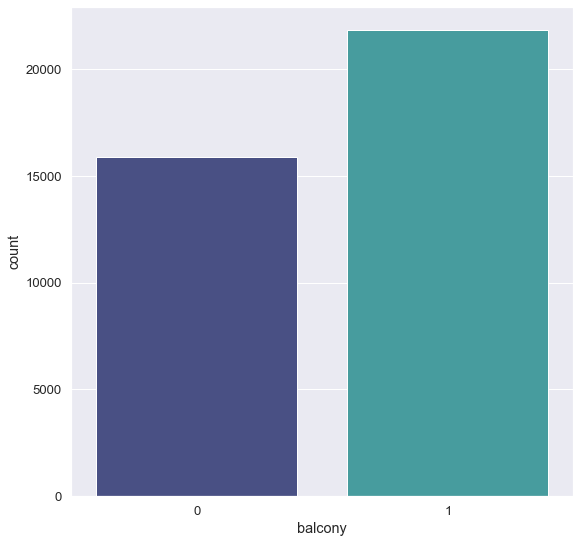

In [240]:
print('balcony')

print(df['balcony'].value_counts())
sns.countplot(x='balcony',data=df,palette='mako')


water_meter
1    19901
0    17808
Name: water_meter, dtype: int64


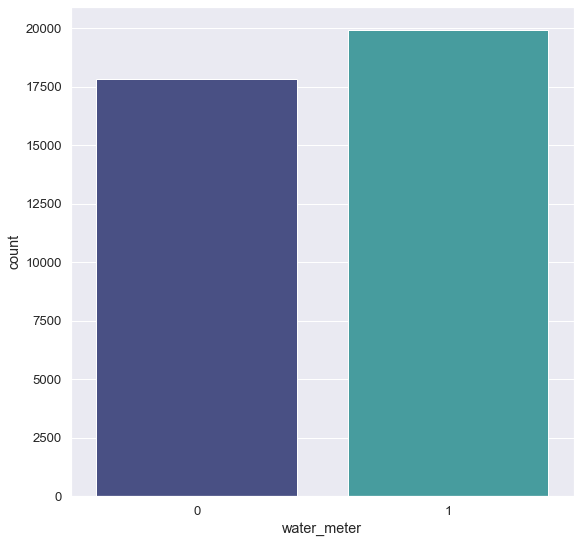

In [241]:
print('water_meter')

print(df['water_meter'].value_counts())
sns.countplot(x='water_meter',data=df,palette='mako')


elevator
0    19262
1    18447
Name: elevator, dtype: int64


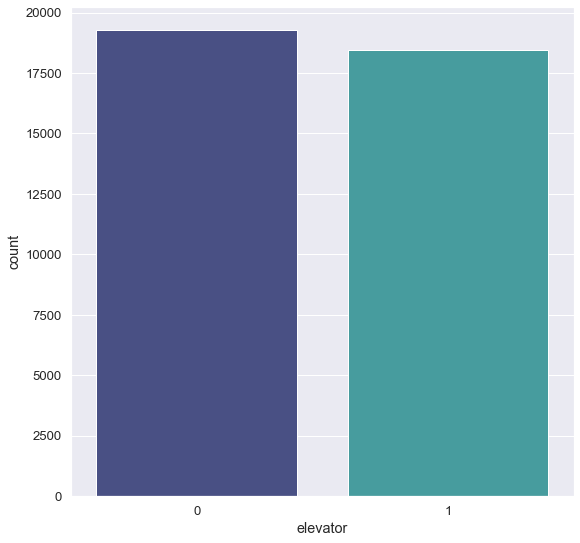

In [242]:
print('elevator')

print(df['elevator'].value_counts())
sns.countplot(x='elevator',data=df,palette='mako')


0    19828
1    17881
Name: security, dtype: int64


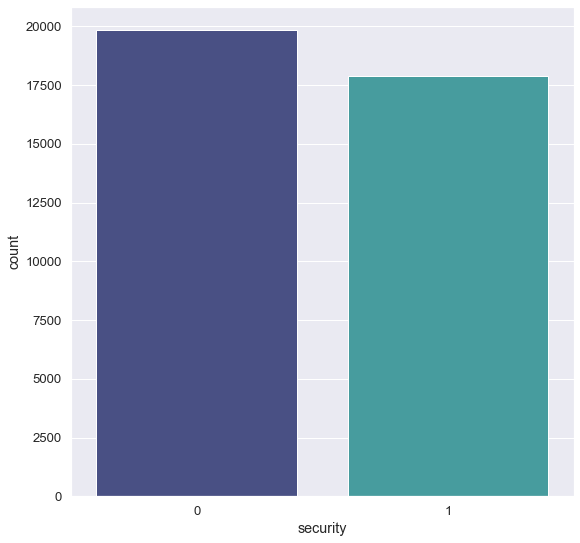

In [214]:
print('maids_room')

print(df['security'].value_counts())
sns.countplot(x='security',data=df,palette='mako')


landline
0    23769
1    13940
Name: landline, dtype: int64


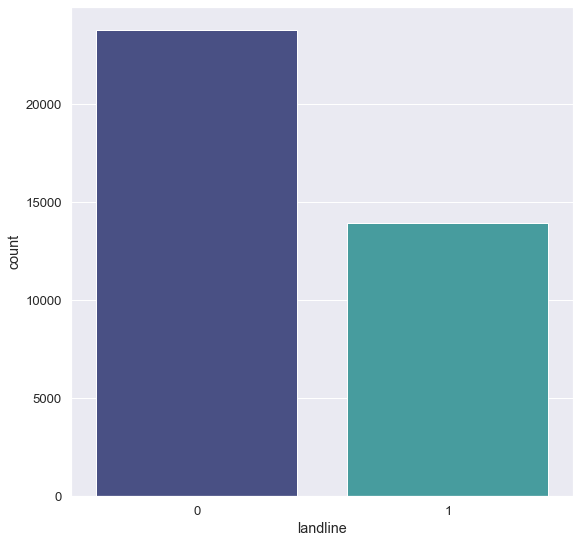

In [245]:
print('landline')

print(df['landline'].value_counts())
sns.countplot(x='landline',data=df,palette='mako')


pets_allowed
0    24727
1    12982
Name: pets_allowed, dtype: int64


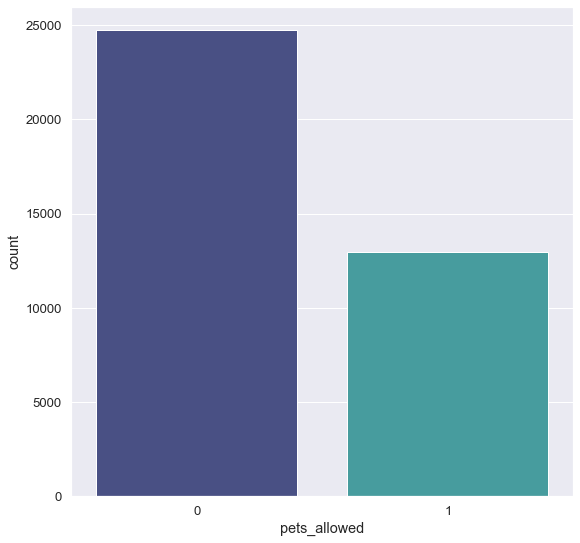

In [246]:
print('pets_allowed')

print(df['pets_allowed'].value_counts())
sns.countplot(x='pets_allowed',data=df,palette='mako')


covered_parking
0    24875
1    12834
Name: covered_parking, dtype: int64


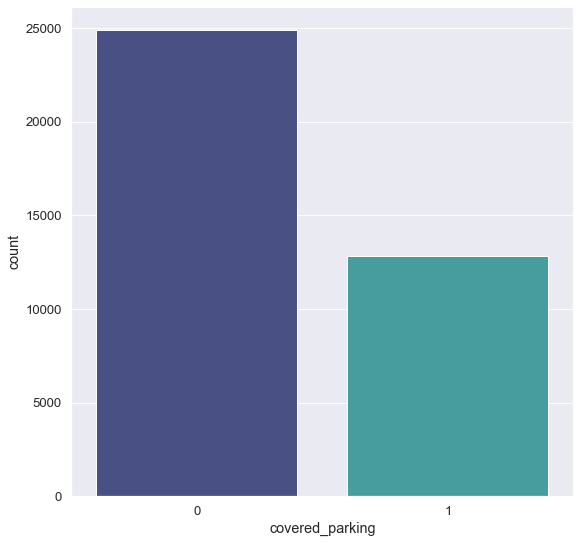

In [247]:
print('covered_parking')

print(df['covered_parking'].value_counts())
sns.countplot(x='covered_parking',data=df,palette='mako')


0    29450
1     8259
Name: private_garden, dtype: int64


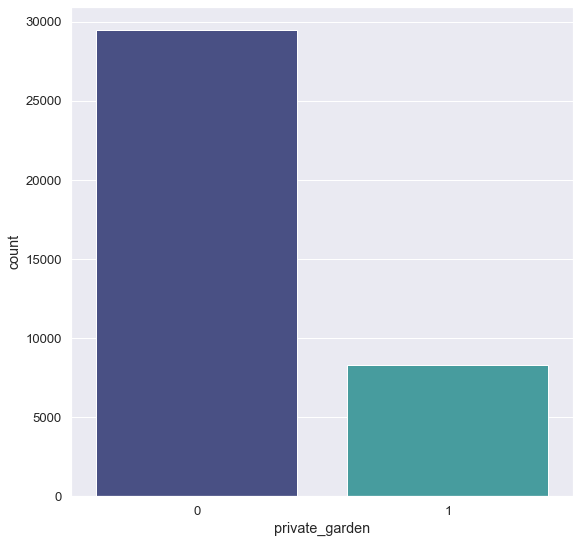

In [218]:
print('maids_room')

print(df['private_garden'].value_counts())
sns.countplot(x='private_garden',data=df,palette='mako')


pool
0    32777
1     4932
Name: pool, dtype: int64


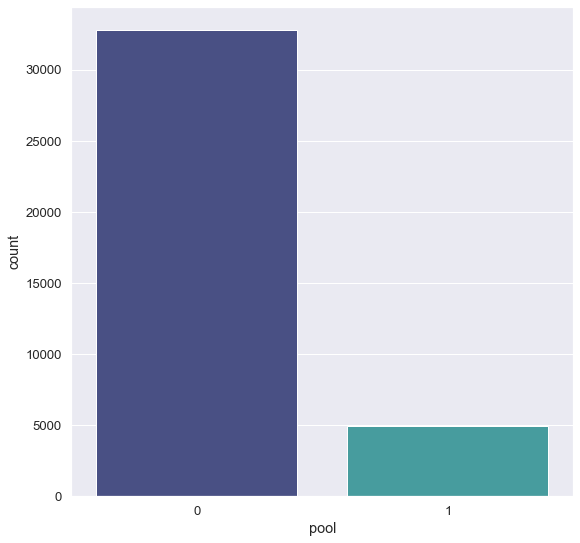

In [248]:
print('pool')

print(df['pool'].value_counts())
sns.countplot(x='pool',data=df,palette='mako')



maids_room
0    33661
1     4048
Name: maids_room, dtype: int64


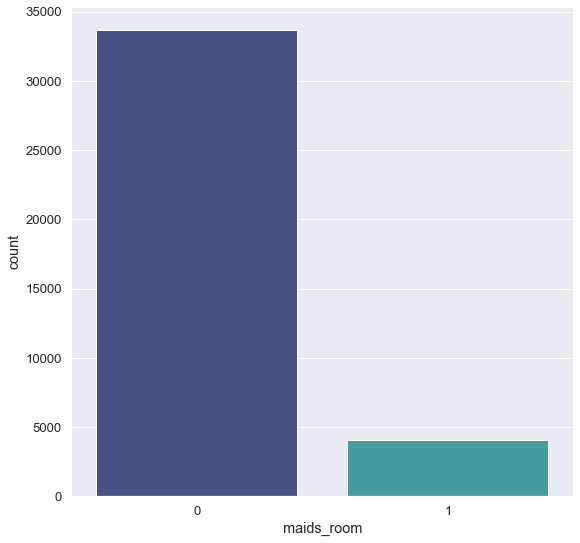

In [250]:
print('maids_room')
print(df['maids_room'].value_counts())
sns.countplot(x='maids_room',data=df,palette='mako')



central_ac_heating
0    33466
1     4243
Name: central_ac_heating, dtype: int64


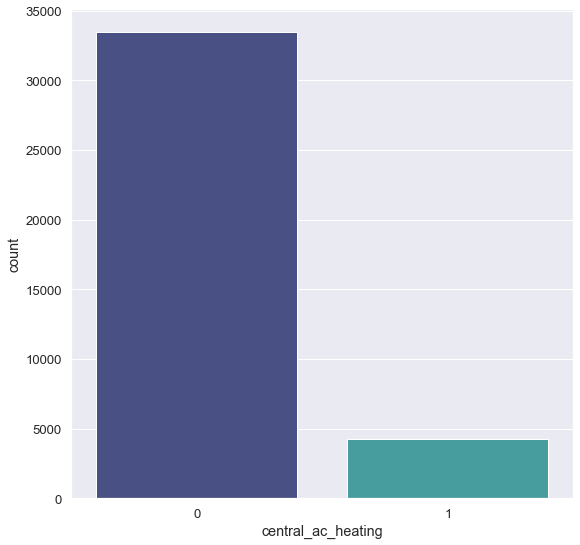

In [249]:
print('central_ac_heating')

print(df['central_ac_heating'].value_counts())
sns.countplot(x='central_ac_heating',data=df,palette='mako')



built_in_kitchen_appliances
0    33717
1     3992
Name: built_in_kitchen_appliances, dtype: int64


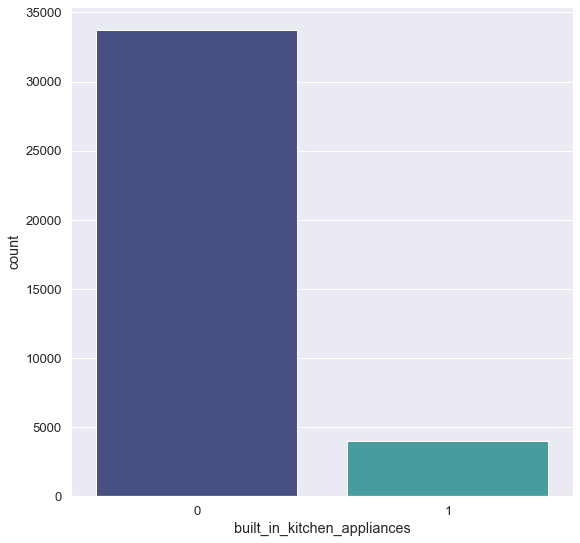

In [225]:
print('built_in_kitchen_appliances')
print(df['built_in_kitchen_appliances'].value_counts())
sns.countplot(x='built_in_kitchen_appliances',data=df,palette='mako')



# Bivariate Analaysis

In [328]:
df.groupby('location').describe()['meterprice']


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
15 May City,193.0,4077.000000,3734.895634,333.0,3157.00,3777.0,4500.00,53333.0
Abasiya,89.0,6862.640449,2058.142914,906.0,5925.00,6923.0,7878.00,10800.0
Ain Shams,1118.0,3930.033095,2126.000998,0.0,2866.75,3600.0,4500.00,35000.0
Al Amiriyyah,72.0,5025.986111,5043.230595,300.0,3459.25,4000.0,5606.25,45000.0
Al Manial,85.0,9203.329412,3601.449504,107.0,6684.00,9189.0,11785.00,16428.0
Almazah,79.0,10050.797468,5065.843434,1217.0,7180.00,9166.0,12403.50,27016.0
Badr City,1684.0,5259.337886,4841.099236,1.0,3000.00,3857.0,5943.00,85820.0
Basateen,46.0,4446.173913,2742.592969,1741.0,2666.25,3514.5,4628.50,13636.0
Dar al-Salaam,199.0,3123.668342,1077.884643,333.0,2500.00,3083.0,3644.50,11538.0


Sorting the meterprice per location as we see 

we can see **Zamalek** is the most expensive for meter per price 

**Dar al-Salaam** is the least expensive for meter per price 

In [322]:
print(df.groupby('location').mean()['meterprice'].nlargest(60))


location
Zamalek                   16612.381443
Madinaty                  12311.537192
New Cairo - El Tagamoa    11418.119169
Rehab City                11335.523200
Sheraton                  10377.297645
Katameya                  10234.165323
Mokattam                  10206.459967
New Capital City          10176.331915
Almazah                   10050.797468
Mostakbal City             9967.205333
Heliopolis                 9925.769563
Al Manial                  9203.329412
Maadi                      9026.652880
Shorouk City               8801.346021
Nasr City                  8602.567291
Zahraa Al Maadi            8188.770295
Shubra                     7509.909483
Downtown Cairo             7485.021841
Abasiya                    6862.640449
Obour City                 6705.255495
Hadayek al-Kobba           6297.159898
Helmeyat El Zaytoun        6004.803601
New Nozha                  5566.019608
Badr City                  5259.337886
Sayeda Zeinab              5257.892473
Waili           

location
Zamalek                   16612.381443
Madinaty                  12311.537192
New Cairo - El Tagamoa    11418.119169
Rehab City                11335.523200
Sheraton                  10377.297645
Katameya                  10234.165323
Mokattam                  10206.459967
New Capital City          10176.331915
Almazah                   10050.797468
Mostakbal City             9967.205333
Heliopolis                 9925.769563
Al Manial                  9203.329412
Maadi                      9026.652880
Shorouk City               8801.346021
Nasr City                  8602.567291
Zahraa Al Maadi            8188.770295
Shubra                     7509.909483
Downtown Cairo             7485.021841
Abasiya                    6862.640449
Obour City                 6705.255495
Hadayek al-Kobba           6297.159898
Helmeyat El Zaytoun        6004.803601
New Nozha                  5566.019608
Badr City                  5259.337886
Sayeda Zeinab              5257.892473
Waili           

location
15 May City                4077.000000
Abasiya                    6862.640449
Ain Shams                  3930.033095
Al Amiriyyah               5025.986111
Al Manial                  9203.329412
Almazah                   10050.797468
Badr City                  5259.337886
Basateen                   4446.173913
Dar al-Salaam              3123.668342
Downtown Cairo             7485.021841
Ezbet El Nakhl             3275.846939
Gesr Al Suez               4069.349776
Hadayek Helwan             3692.910405
Hadayek al-Kobba           6297.159898
Heliopolis                 9925.769563
Helmeyat El Zaytoun        6004.803601
Helwan                     4143.998821
Katameya                  10234.165323
Maadi                      9026.652880
Madinaty                  12311.537192
Marg                       3238.067024
Matareya                   3936.024691
Mokattam                  10206.459967
Mostakbal City             9967.205333
Nasr City                  8602.567291
New Cairo - El T

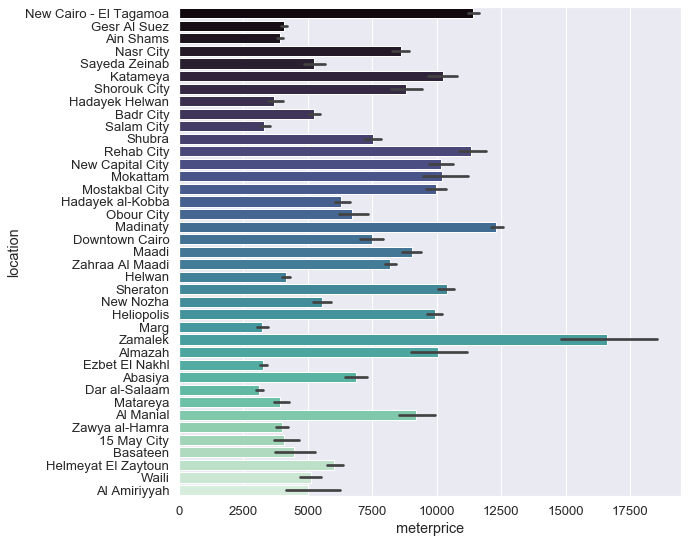

In [311]:
print(df.groupby('location').mean()['meterprice'])
sns.barplot(y='location',x='meterprice',data=df,estimator=np.mean,palette='mako')

as here we can see there are a outliers which we can deal with at after
 
 and the outlier in area because the meter price is price over area

In [341]:
print(df.groupby('location').min()['meterprice'])
df[(df['location']=='Ain Shams') & (df['meterprice']<10)]



location
15 May City                333
Abasiya                    906
Ain Shams                    0
Al Amiriyyah               300
Al Manial                  107
Almazah                   1217
Badr City                    1
Basateen                  1741
Dar al-Salaam              333
Downtown Cairo               3
Ezbet El Nakhl             333
Gesr Al Suez                 1
Hadayek Helwan             205
Hadayek al-Kobba           520
Heliopolis                   1
Helmeyat El Zaytoun          1
Helwan                       2
Katameya                   200
Maadi                      117
Madinaty                     1
Marg                       277
Matareya                     3
Mokattam                     1
Mostakbal City             554
Nasr City                  200
New Cairo - El Tagamoa      97
New Capital City             1
New Nozha                  181
Obour City                 125
Rehab City                 181
Salam City                 312
Sayeda Zeinab              600

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
26009,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه ب المهندسين,2022-02-28,Ain Shams,no_compound,Apartment,385000,1000000,1,8,...,0,0,0,0,0,0,0,0,2,0


In [342]:
df[(df['location']=='Badr City') & (df['meterprice']==1)]

,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
27935,https://www.olx.com.eg/en/ad/%D8%A8%D8%B3%D8%B...,بسعر محروووق شقة سكن مصر 116متر الأقرب للعاصمه...,2022-02-28,Badr City,Sakan Masr,Apartment,120000,115155,3,1,...,0,0,0,0,0,0,0,0,2,1


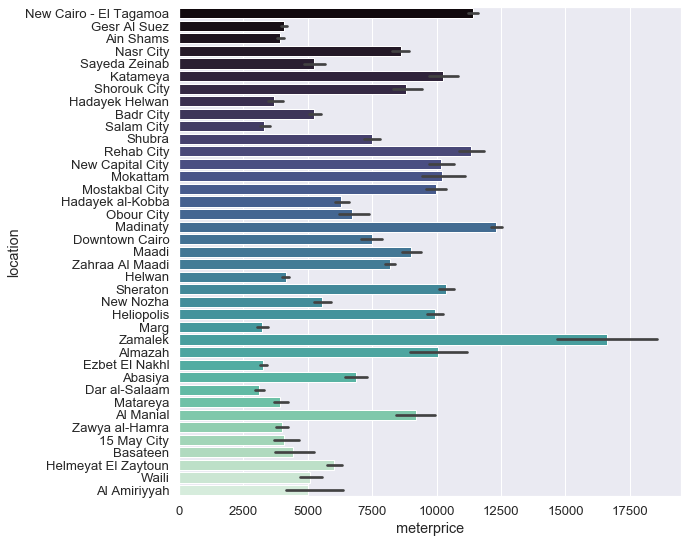

In [255]:
sns.barplot(y='location',x='meterprice',data=df,estimator=np.mean,palette='mako')

In [ ]:
the most down_payument value is in 

location
Al Manial              1.319719e+07
Dar al-Salaam          1.101619e+07
Zawya al-Hamra         7.367938e+06
Matareya               6.482855e+06
Salam City             5.035895e+06
Hadayek Helwan         3.302490e+06
Marg                   3.132495e+06
Helmeyat El Zaytoun    2.597923e+06
Maadi                  1.822397e+06
Helwan                 1.267760e+06
Name: down_payment, dtype: float64


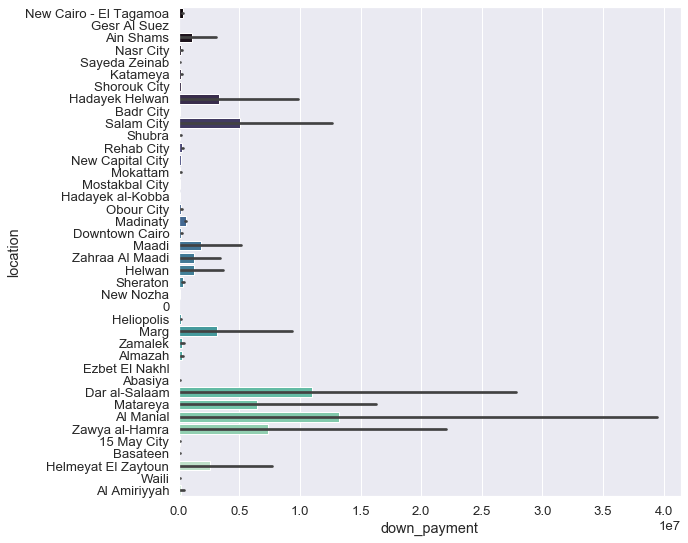

In [358]:
print(df.groupby('location').mean()['down_payment'].nlargest(10))
sns.barplot(y='location',x='down_payment',data=df,estimator=np.mean,palette='mako')

here as we see we can see the down payment is negative so we should solve it as we see it's completly 

unreal data 1B and the price is 2M ? 

so we make it = 0 merans no payment

In [355]:
df[df['down_payment']<0]

In [ ]:
df[df['down_payment']<0]=0